In [1]:
import math
import torch
import gpytorch
import matplotlib.pyplot as plt

In [2]:
# Training data is 100 points in [0,1] inclusive regularly spaced
train_x = torch.linspace(0, 1, 100)

# True function is sin(2*pi*x) with Gaussian noise
train_y = torch.sin(train_x * (2 * math.pi)) + torch.randn(train_x.size()) * math.sqrt(0.04)

In [3]:
#This is for quick construction of Gaussian Process

#what do you need?

#1. A GP model --> gpytorch.models.ExactGP, this handles inference
#2. A likelihood --> gaussian (homoskedastic)
#3. Mean --> Start with constant mean
#4 Kernel
#5 Multivariate normal distribution


In [4]:
#GP model created by user needs

#init (training data, likelihood) and constructs mean and kernel
#forward

In [5]:
class surrogate(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(surrogate,self).__init__(train_x,train_y,likelihood)
        self.mean = gpytorch.means.ConstantMean()
        self.covar = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean = self.mean(x)
        covar = self.covar(x)
        return gpytorch.distributions.MultivariateNormal(mean,covar)

In [6]:
# initialize likelihood and model
likelihood = gpytorch.likelihoods.GaussianLikelihood() #homoskedastic noise
surrogate = surrogate(train_x, train_y,likelihood)

In [7]:
surrogate.train()
#sets model to training mode

surrogate(
  (likelihood): GaussianLikelihood(
    (noise_covar): HomoskedasticNoise(
      (raw_noise_constraint): GreaterThan(1.000E-04)
    )
  )
  (mean): ConstantMean()
  (covar): ScaleKernel(
    (base_kernel): RBFKernel(
      (raw_lengthscale_constraint): Positive()
    )
    (raw_outputscale_constraint): Positive()
  )
)

In [8]:
type(likelihood.train())

gpytorch.likelihoods.gaussian_likelihood.GaussianLikelihood

In [9]:
type(surrogate)

__main__.surrogate

In [10]:
type(surrogate.mean)

gpytorch.means.constant_mean.ConstantMean

In [11]:
type(surrogate.covar)

gpytorch.kernels.scale_kernel.ScaleKernel

Training

In [15]:

"""Optimizer types:
For general GP training → Use Adam (default, easy to tune).
For smooth convergence and better local optima → Use L-BFGS.
For large datasets or online learning → Use SGD.
For noisy gradient settings → Use RMSprop or Adagrad (less common)."""


def train(surrogate,train_x,train_y,training_iter):
    
    # Find optimal model hyperparameters
    surrogate.train() #this doesn't actually train it just sets the surrogate into training mode
    surrogate.likelihood.train()

    # Use the adam optimizer
    optimizer = torch.optim.Adam(surrogate.parameters(), lr=0.1)  # Includes GaussianLikelihood parameters

    # "Loss" for GPs - the marginal log likelihood
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, surrogate)

    for i in range(training_iter):
        
        # Zero gradients from previous iteration
        optimizer.zero_grad()
       # Output from model
        output = surrogate(train_x)
        # Calc loss and backprop gradients
        loss = -mll(output, train_y)
        loss.backward()
        
        print('Iter %d/%d - Loss: %.3f   lengthscale: %.3f   noise: %.3f' % (
            i + 1, training_iter, loss.item(),
            surrogate.covar.base_kernel.lengthscale.item(),
            surrogate.likelihood.noise.item()
        ))
        optimizer.step()

In [13]:
surrogate.covar.base_kernel.lengthscale.item()

0.6931471824645996

In [ ]:
type(surrogate.forward(train_x))

gpytorch.distributions.multivariate_normal.MultivariateNormal

In [ ]:
type(surrogate.parameters())

generator

In [ ]:
(train_x).size()


torch.Size([100])

In [ ]:
surrogate.mean(train_x).size()

torch.Size([100])

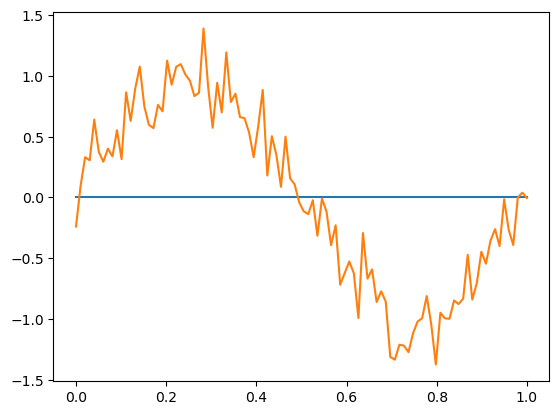

In [ ]:
plt.plot(train_x,surrogate.mean(train_x).detach()) #detach gets rid of gradients in surrogate.mean tensor
plt.plot(train_x,train_y)

In [ ]:
print(surrogate.mean(train_x))


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.], grad_fn=<ExpandBackward0>)


In [ ]:
print(surrogate.mean(train_x).detach())


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])


In [ ]:
optimizer = torch.optim.Adam(surrogate.parameters(), lr = .01)


In [ ]:
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, surrogate)
type(mll)

gpytorch.mlls.exact_marginal_log_likelihood.ExactMarginalLogLikelihood

In [16]:
train(surrogate,train_x,train_y,50)

Iter 1/50 - Loss: 0.946   lengthscale: 0.693   noise: 0.693
Iter 2/50 - Loss: 0.915   lengthscale: 0.644   noise: 0.644
Iter 3/50 - Loss: 0.881   lengthscale: 0.598   noise: 0.598
Iter 4/50 - Loss: 0.843   lengthscale: 0.555   noise: 0.554
Iter 5/50 - Loss: 0.800   lengthscale: 0.514   noise: 0.513
Iter 6/50 - Loss: 0.751   lengthscale: 0.476   noise: 0.474
Iter 7/50 - Loss: 0.698   lengthscale: 0.439   noise: 0.437
Iter 8/50 - Loss: 0.644   lengthscale: 0.405   noise: 0.402
Iter 9/50 - Loss: 0.592   lengthscale: 0.372   noise: 0.369
Iter 10/50 - Loss: 0.544   lengthscale: 0.342   noise: 0.339
Iter 11/50 - Loss: 0.501   lengthscale: 0.315   noise: 0.310
Iter 12/50 - Loss: 0.462   lengthscale: 0.292   noise: 0.284
Iter 13/50 - Loss: 0.425   lengthscale: 0.271   noise: 0.259
Iter 14/50 - Loss: 0.390   lengthscale: 0.255   noise: 0.236
Iter 15/50 - Loss: 0.355   lengthscale: 0.241   noise: 0.215
Iter 16/50 - Loss: 0.321   lengthscale: 0.230   noise: 0.196
Iter 17/50 - Loss: 0.287   length